In [1]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST, KMNIST# Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

In [2]:
def generator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True)
    )

In [3]:
class Generator(nn.Module):
  def __init__(self, z_dim = 10, im_dim = 784, hidden_dim = 128):
    super().__init__()
    self.gen = nn.Sequential(generator_block(z_dim, hidden_dim),
                             generator_block(hidden_dim, hidden_dim * 2),
                             generator_block(hidden_dim * 2, hidden_dim * 4),
                             generator_block(hidden_dim * 4, hidden_dim * 8),
                             nn.Linear(hidden_dim * 8, im_dim),
                             nn.Sigmoid())

  def forward(self, noise):
    return self.gen(noise)


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
def get_noise(n_samples, z_dim, device=device):
    return torch.randn(n_samples,z_dim,device=device)


In [6]:
def discriminator_block(input_dim, output_dim):
    return nn.Sequential(nn.Linear(input_dim, output_dim),
                         nn.LeakyReLU(0.2, inplace = True))

In [7]:
class Discriminator(nn.Module):
  def __init__(self,im_dim = 784, hidden_dim = 128):
    super().__init__()
    self.disc = nn.Sequential(discriminator_block(im_dim, hidden_dim * 4),
                              discriminator_block(hidden_dim * 4, hidden_dim * 2),
                              discriminator_block(hidden_dim * 2, hidden_dim),
                              nn.Linear(hidden_dim, 1))
  def forward(self, image):
    return self.disc(image)
  def get_disc(self):
    return self.disc

In [8]:
loss_fn = nn.BCEWithLogitsLoss()
n_epoch = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 0.00001
device = 'cuda'
dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17548314.02it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 485868.22it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4380290.28it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5037157.26it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [9]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [10]:
def get_disc_loss(gen, disc, loss_fn, real, num_images, z_dim, device):
    fake_noise = get_noise(num_images, z_dim, device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake.detach())
    disc_fake_loss = loss_fn(disc_fake_pred, torch.zeros_like(disc_fake_pred))
    disc_real_pred = disc(real)
    disc_real_loss = loss_fn(disc_real_pred, torch.ones_like(disc_real_pred))
    disc_loss = (disc_fake_loss + disc_real_loss) / 2
    return disc_loss

In [11]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake)
    gen_loss = loss_fn(disc_fake_pred, torch.ones_like(disc_fake_pred))
    return gen_loss

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator loss: 1.3880774766206745, discriminator loss: 0.419259883701801


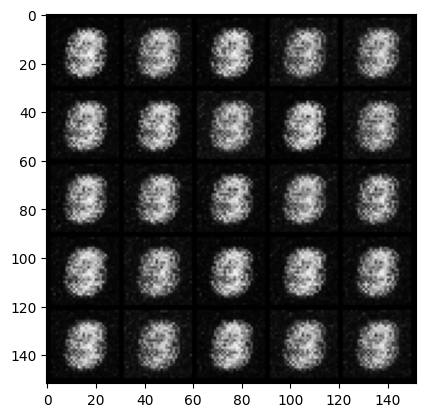

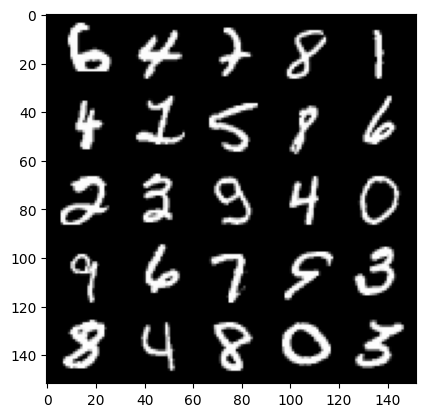

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator loss: 1.6689664766788488, discriminator loss: 0.3002841672599312


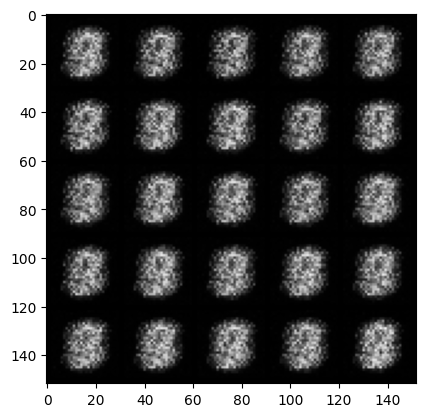

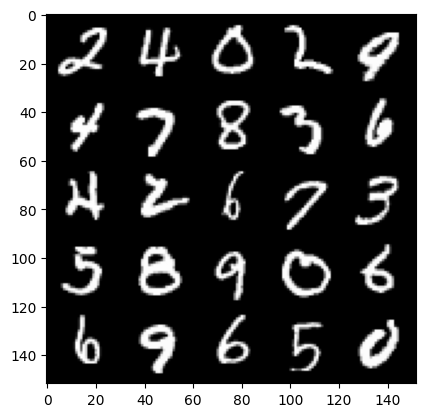

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator loss: 1.9593542075157158, discriminator loss: 0.1741582162976264


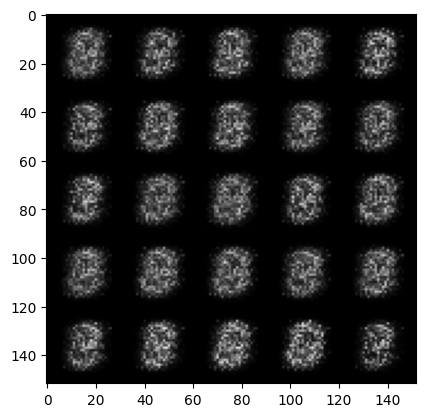

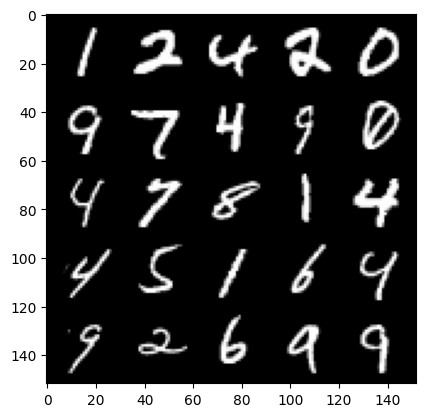

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator loss: 1.7620599417686456, discriminator loss: 0.19567712315917024


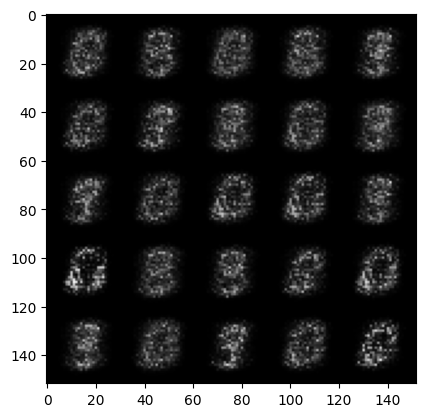

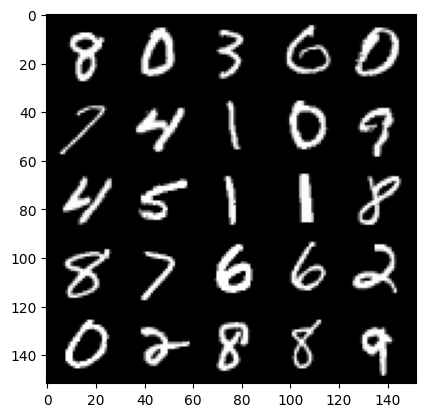

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator loss: 1.7258853509426118, discriminator loss: 0.1949902396798135


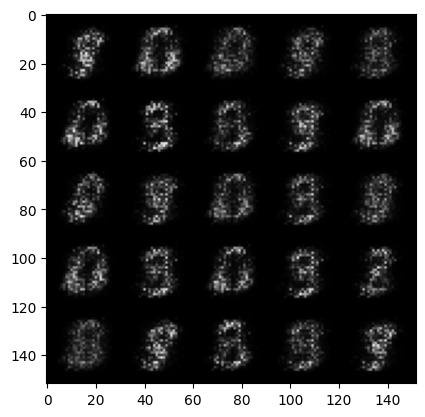

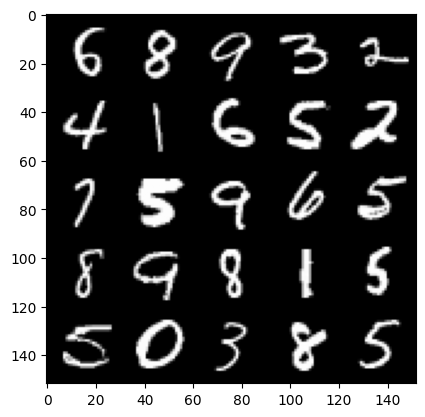

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator loss: 2.0241021432876587, discriminator loss: 0.15115172801911828


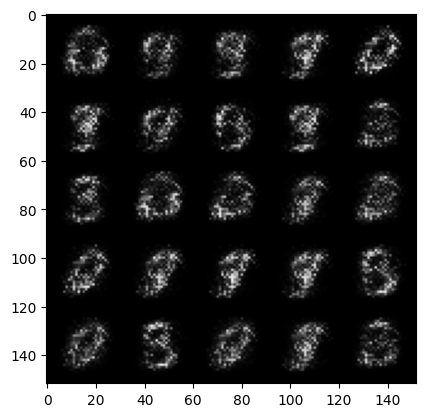

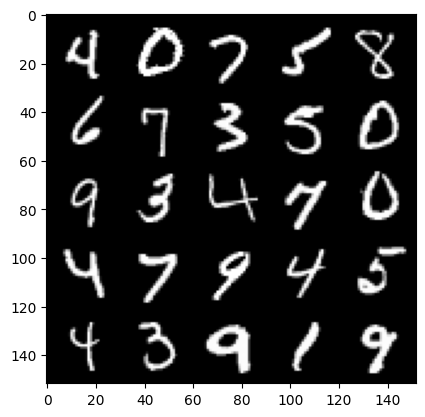

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator loss: 2.403905700206759, discriminator loss: 0.1256361185610294


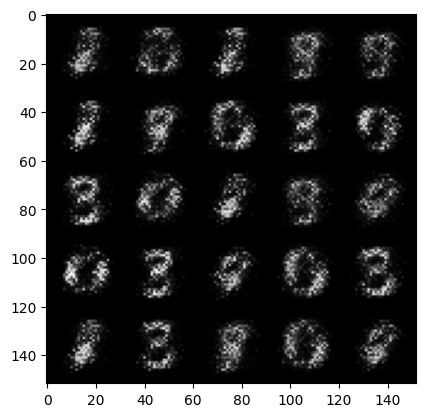

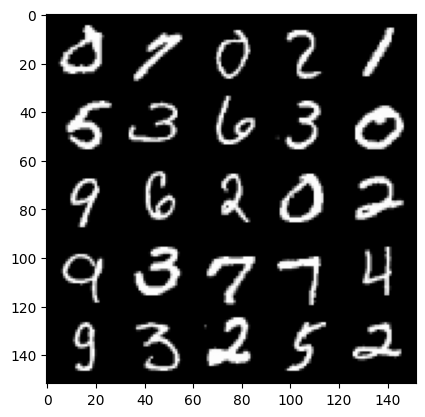

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator loss: 2.708461202621462, discriminator loss: 0.12470809704065329


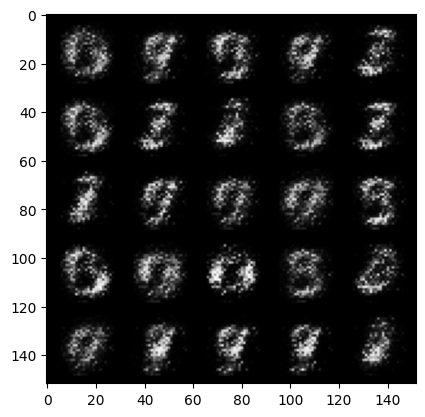

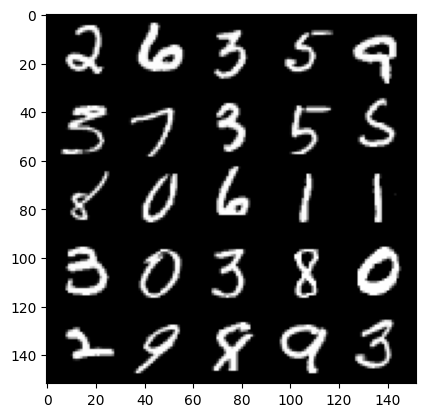

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator loss: 3.1915947027206446, discriminator loss: 0.09926906828582288


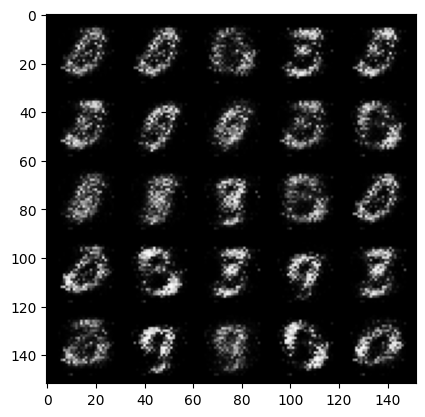

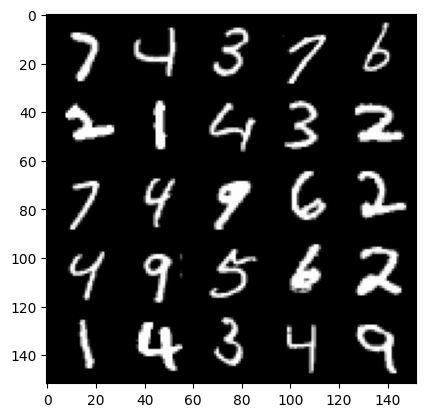

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 3.4632172279357945, discriminator loss: 0.0804524765238166


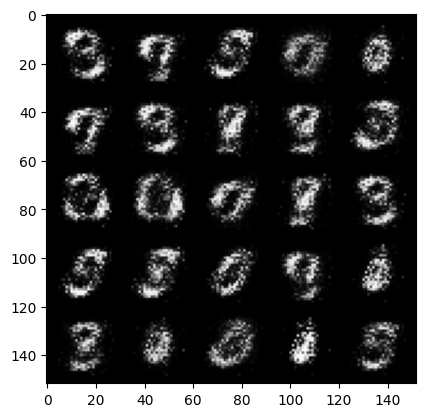

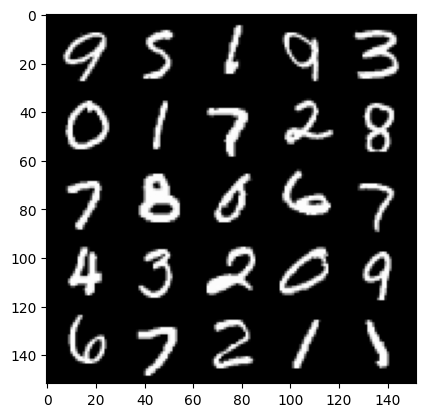

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator loss: 3.7340779204368584, discriminator loss: 0.08094288958609097


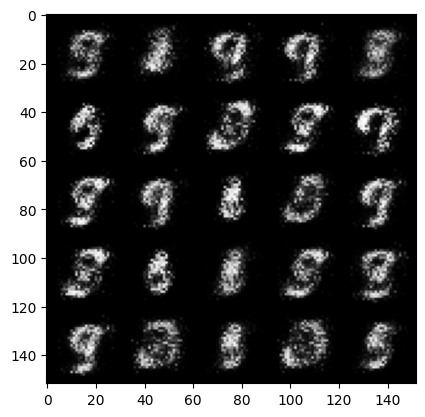

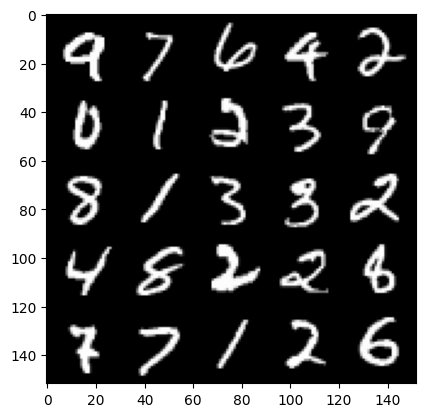

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator loss: 3.754347914218901, discriminator loss: 0.07820147620141499


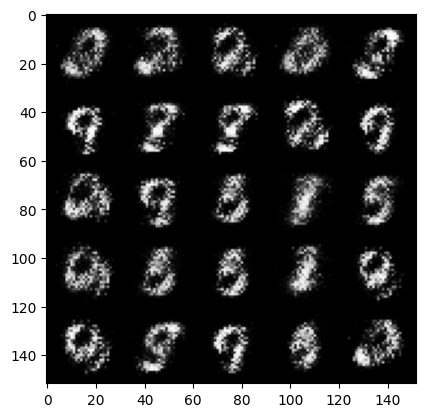

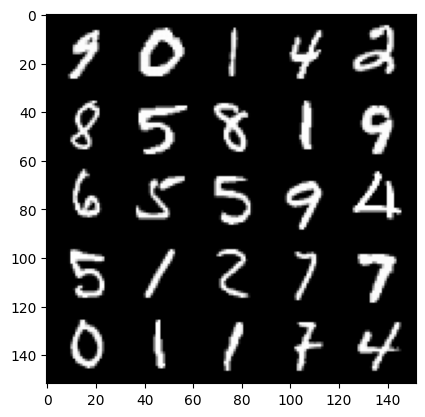

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator loss: 3.891697917461397, discriminator loss: 0.06377236521244053


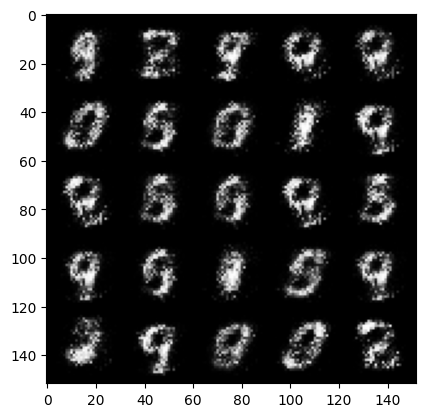

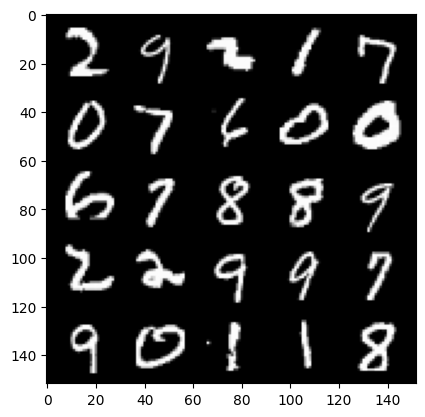

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator loss: 3.964351305961609, discriminator loss: 0.05128816145658498


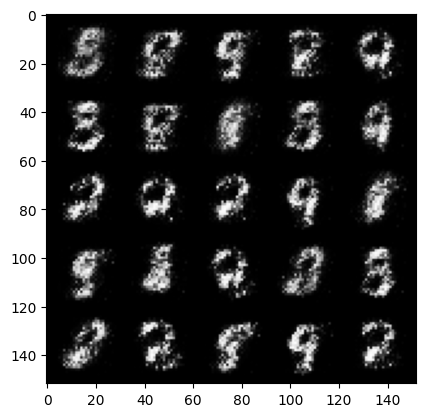

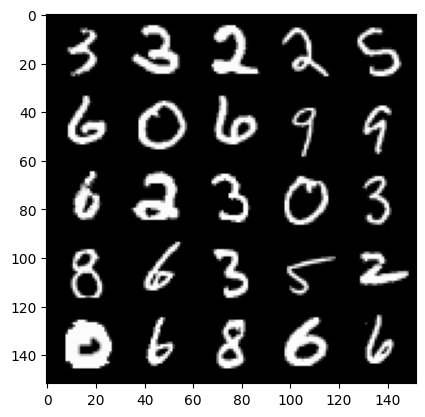

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator loss: 4.134282055854797, discriminator loss: 0.04745957019925119


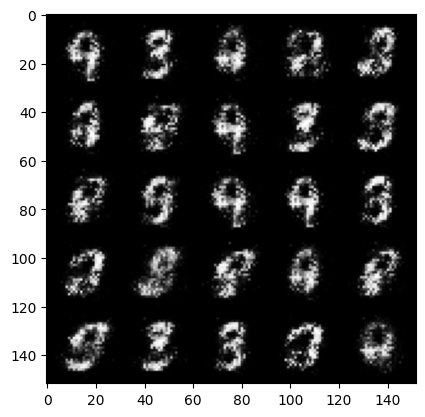

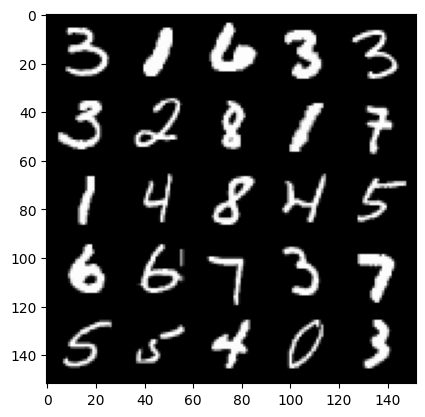

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator loss: 4.079577991485594, discriminator loss: 0.05525929186865682


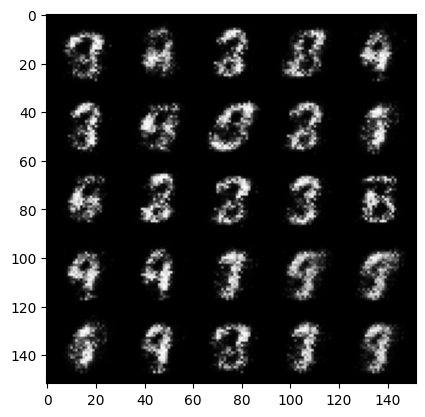

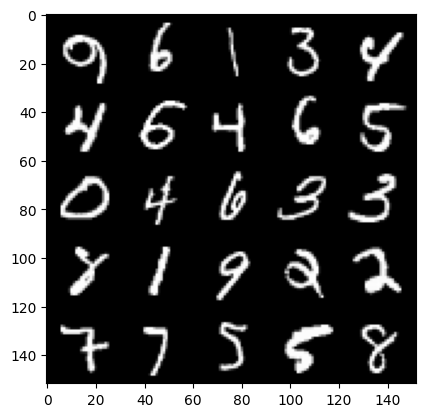

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator loss: 3.9827571473121623, discriminator loss: 0.061278926327824564


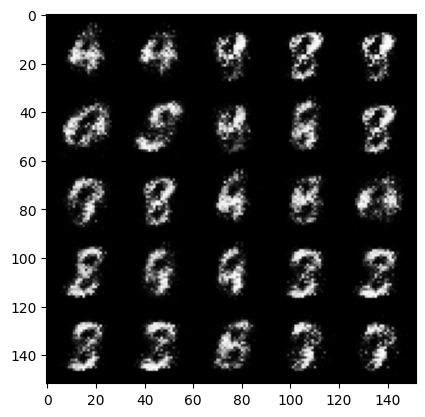

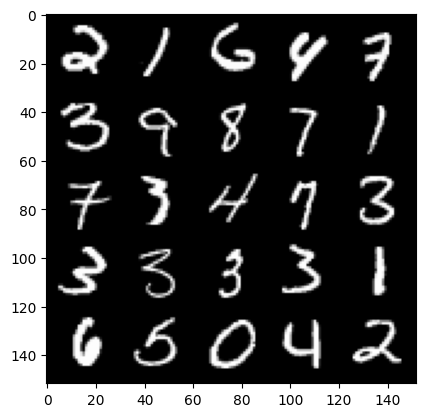

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator loss: 3.9726552858352697, discriminator loss: 0.06194322872161865


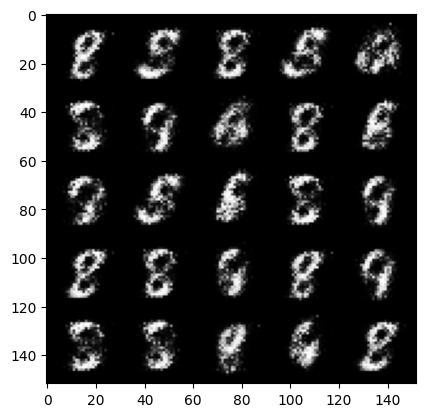

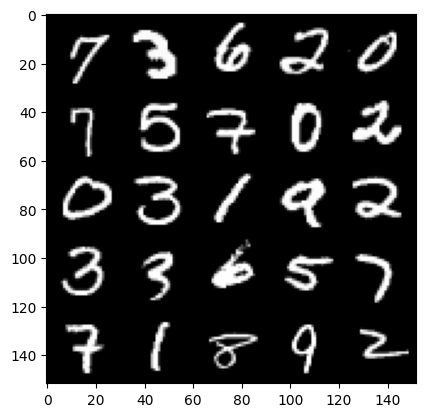

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator loss: 4.055584002494812, discriminator loss: 0.05720624478533862


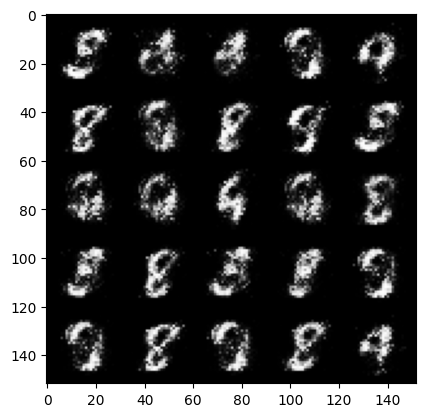

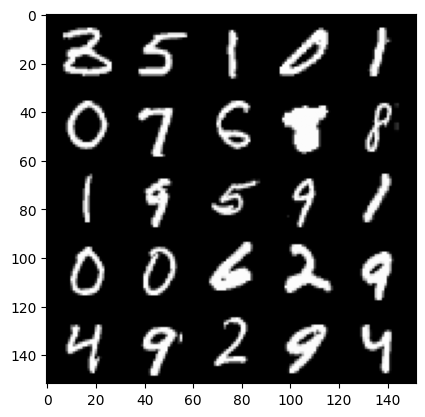

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 4.184564698696137, discriminator loss: 0.06097098743543027


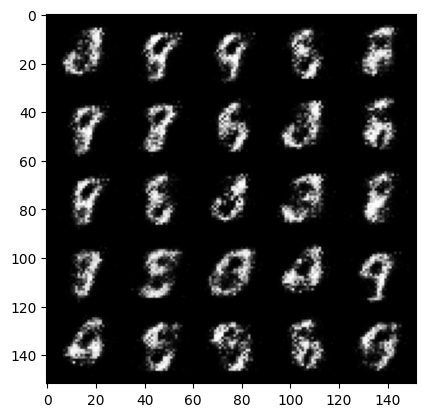

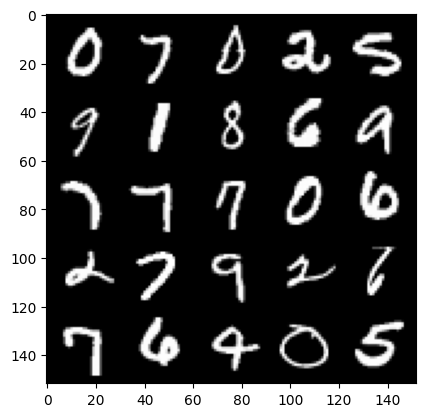

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator loss: 4.068354935169222, discriminator loss: 0.07067517407983533


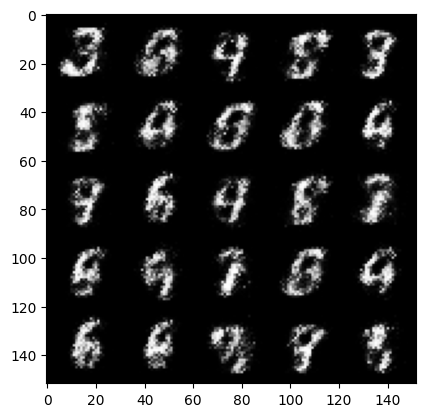

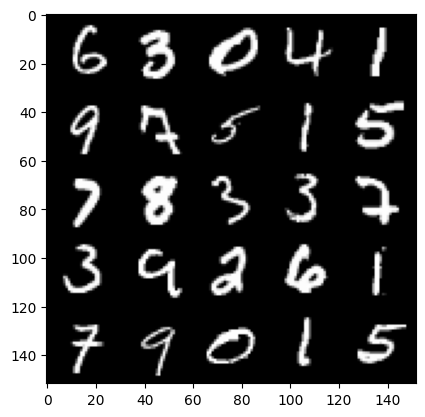

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator loss: 4.000977763652802, discriminator loss: 0.07832703442871576


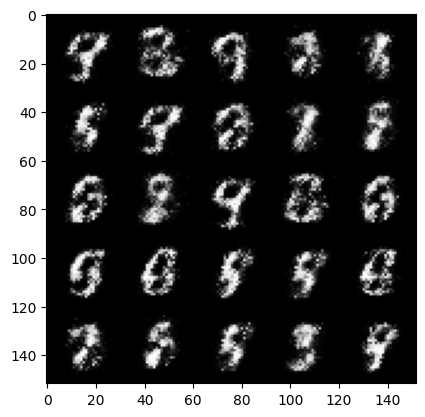

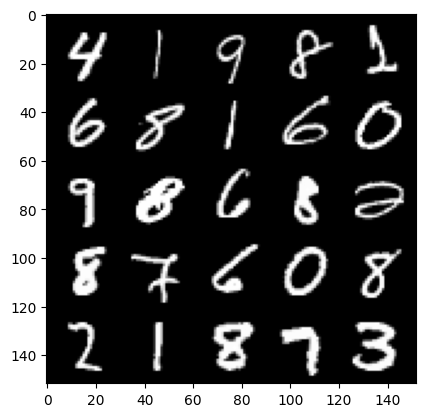

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator loss: 3.830276472568513, discriminator loss: 0.08572315943241121


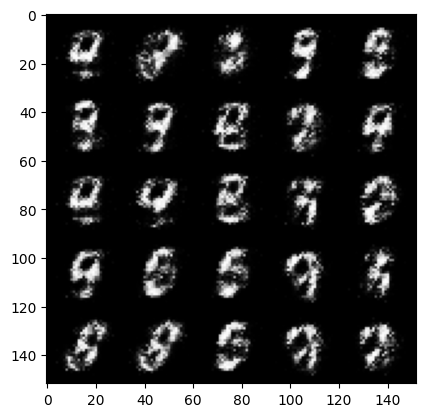

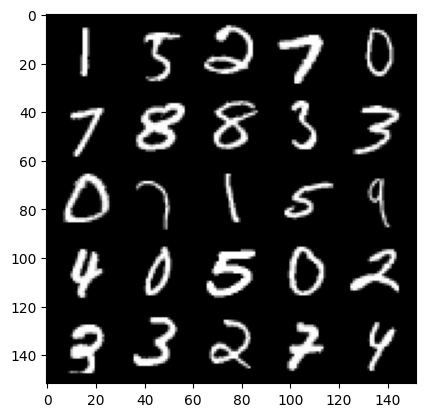

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator loss: 3.9003482542037937, discriminator loss: 0.08726238570362331


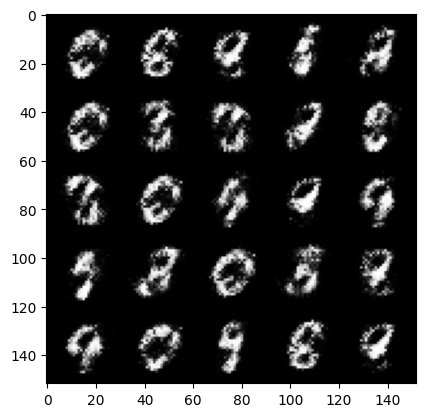

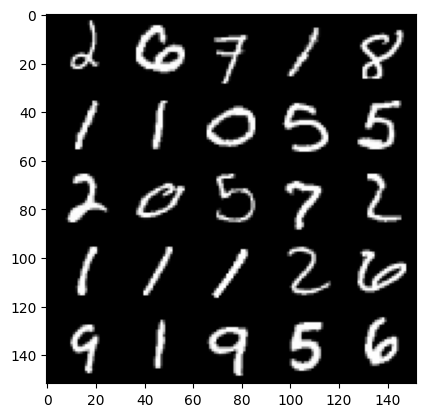

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator loss: 3.698207109451292, discriminator loss: 0.08861229871213439


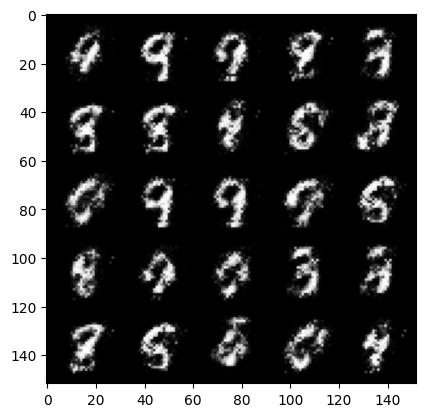

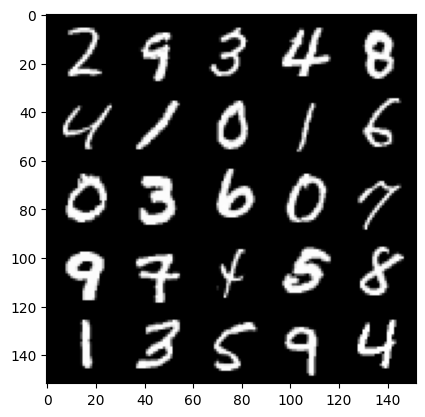

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator loss: 3.8475849242210365, discriminator loss: 0.08689244521409273


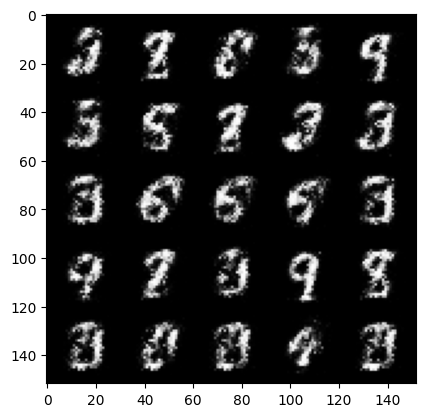

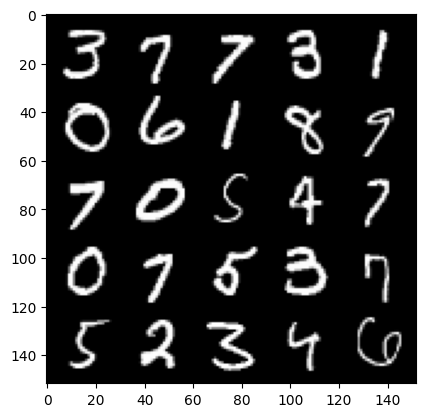

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13500: Generator loss: 3.770753537654878, discriminator loss: 0.09957569187879556


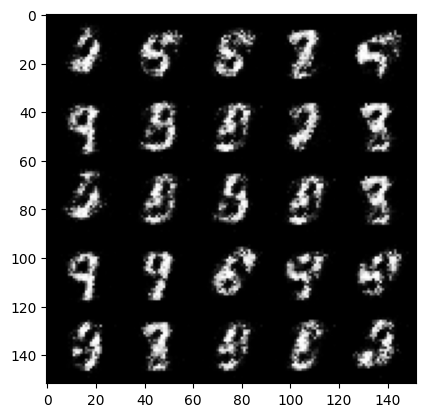

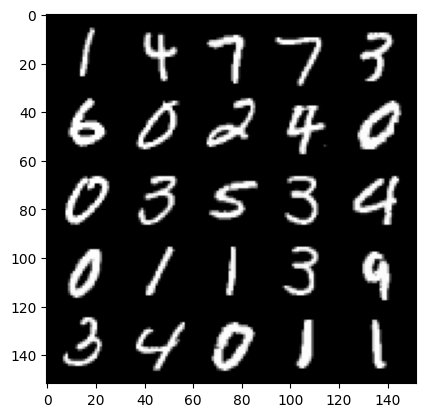

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14000: Generator loss: 3.8129836397171015, discriminator loss: 0.10664938984066245


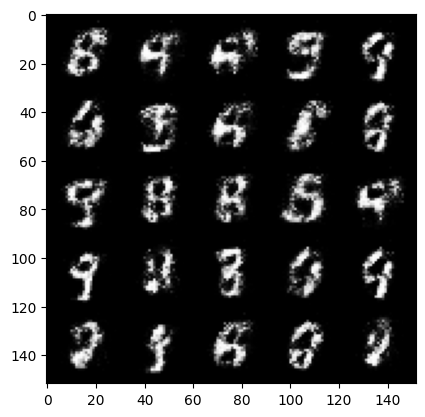

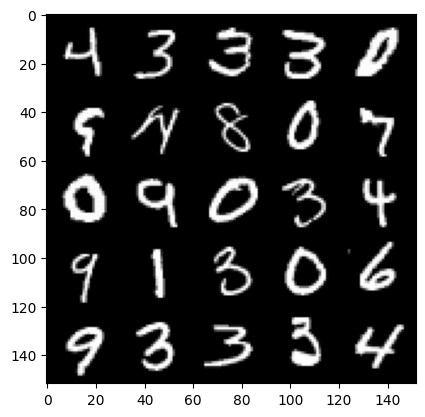

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14500: Generator loss: 3.5178970632553086, discriminator loss: 0.12615425406396388


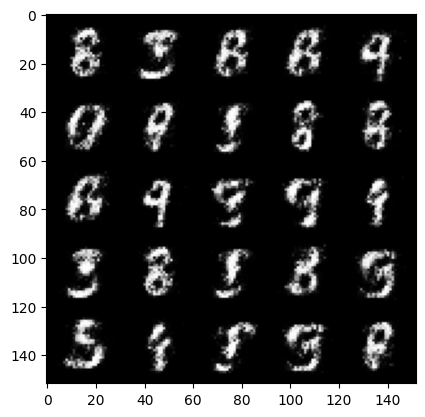

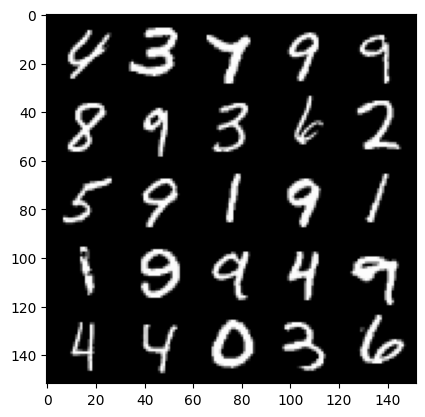

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True
gen_loss = None
error = False
device = 'cuda'
for epoch in range(n_epoch):

    # Dataloader returns the batches
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

        # Flatten the batch of real images from the dataset
        real = real.view(cur_batch_size, -1).to(device)

        ### Update discriminator ###
        # Zero out the gradients before backpropagation
        disc_opt.zero_grad()

        # Calculate discriminator loss
        disc_loss = get_disc_loss(gen, disc, loss_fn, real, cur_batch_size, z_dim, device)

        # Update gradients
        disc_loss.backward(retain_graph=True)

        # Update optimizer
        disc_opt.step()

        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, loss_fn, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()
        

        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.0005 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
            except:
                error = True
                print("Runtime tests have failed")

        # Keep track of the average discriminator loss
        mean_discriminator_loss += disc_loss.item() / display_step

        # Keep track of the average generator loss
        mean_generator_loss += gen_loss.item() / display_step

        ### Visualization code ###
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1